In [ ]:
import numpy as np
from keras.datasets import mnist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, Birch
from matplotlib.pyplot import figure

In [ ]:
(data, data_label), (test_X, test_Y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
data = data.reshape(len(data),-1)[:200]
data = data / 255
data.shape

(200, 784)

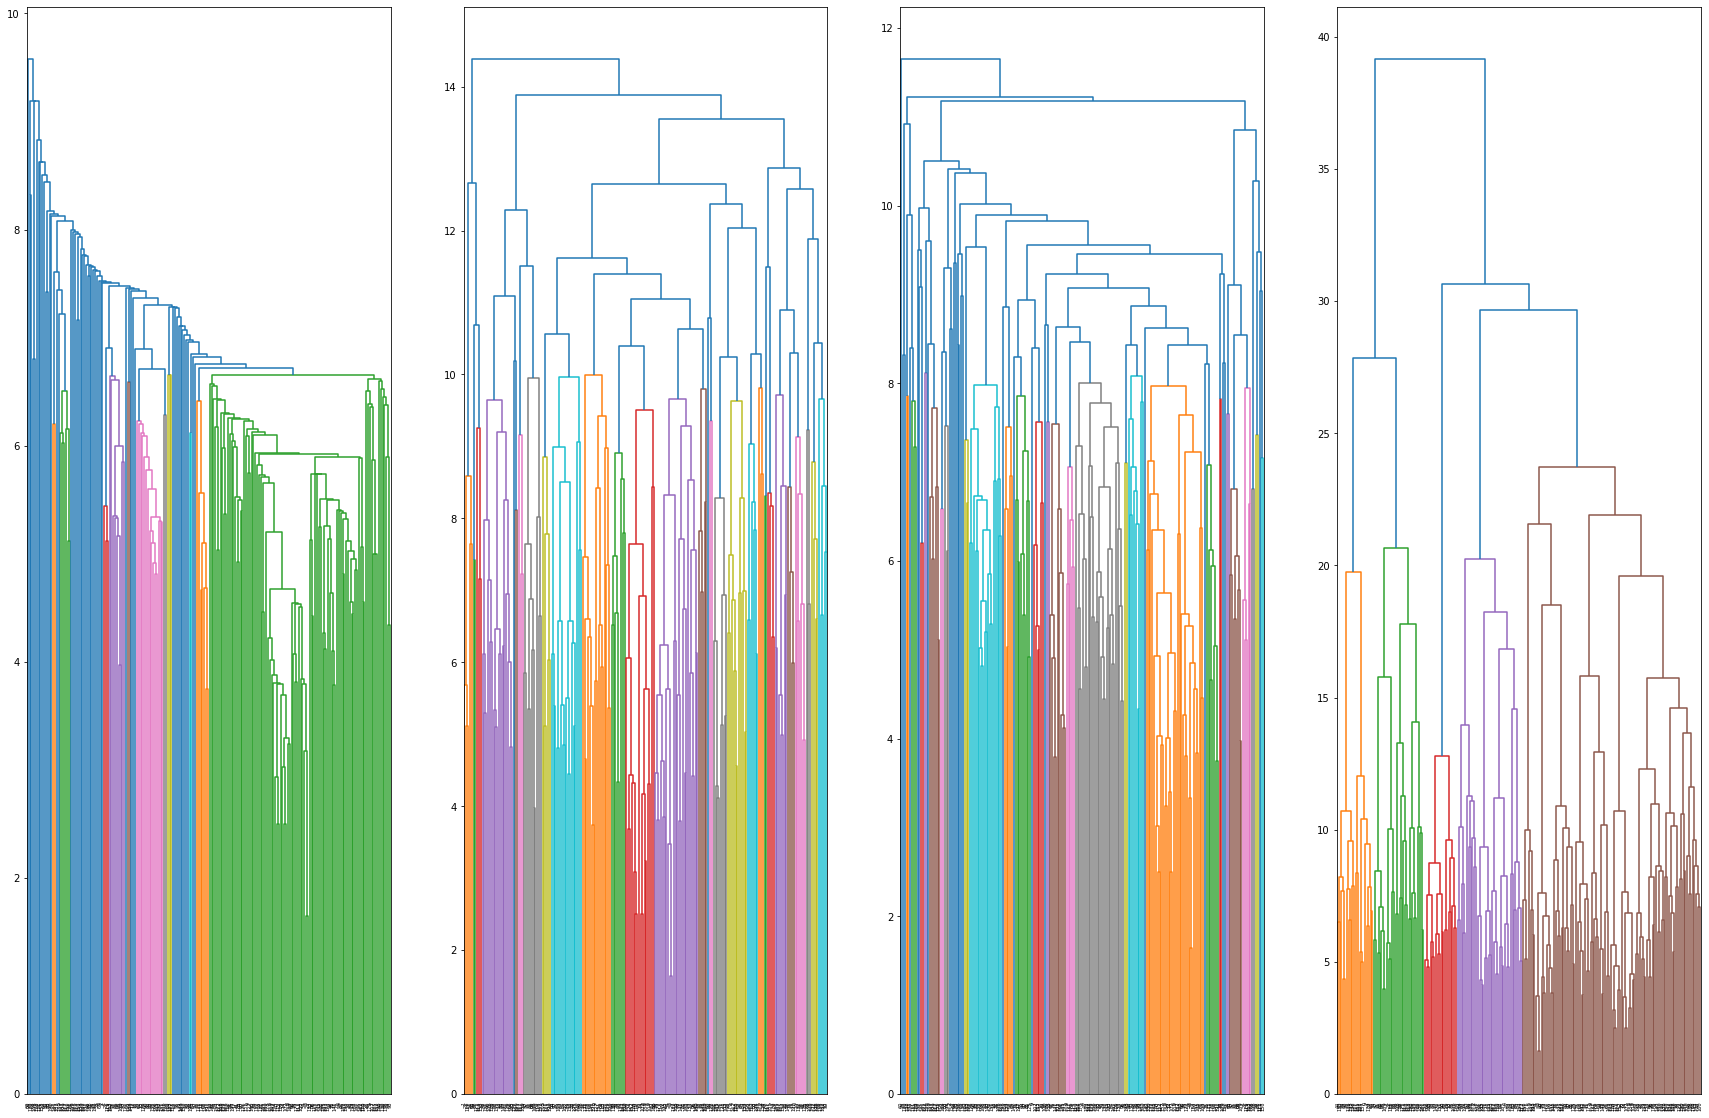

In [ ]:
fig = plt.figure(figsize=(30,20))

Z = linkage(data,  method = 'single', metric = 'euclidean')
plt.subplot(1,4,1)
dn = dendrogram(Z)

Z = linkage(data,  method = 'complete', metric = 'euclidean')
plt.subplot(1,4,2)
dn = dendrogram(Z)

Z = linkage(data,  method = 'average', metric = 'euclidean')
plt.subplot(1,4,3)
dn = dendrogram(Z)

Z = linkage(data,  method = 'ward', metric = 'euclidean')
plt.subplot(1,4,4)
dn = dendrogram(Z)

plt.show()

In [ ]:
ward = AgglomerativeClustering(n_clusters= 10, affinity = 'euclidean', linkage = 'ward')
ward.fit_predict(data)
ward.labels_
np.bincount(ward.labels_)

array([20, 22, 50, 25, 16, 18, 19,  7, 12, 11])

In [ ]:
average = AgglomerativeClustering(n_clusters= 10, affinity = 'euclidean', linkage = 'average')
average.fit_predict(data)
average.labels_
np.bincount(average.labels_)

array([148,   5,  13,   2,   2,  14,   6,   1,   7,   2])

In [ ]:
brc = Birch(threshold=0.1, branching_factor=10, n_clusters = 10)
brc.fit(data)
brc.predict(data)
np.bincount(brc.labels_)

array([20, 22, 50, 25, 16, 18, 19,  7, 12, 11])

In [ ]:
data = data.reshape(len(data),28, 28)
data = data*255


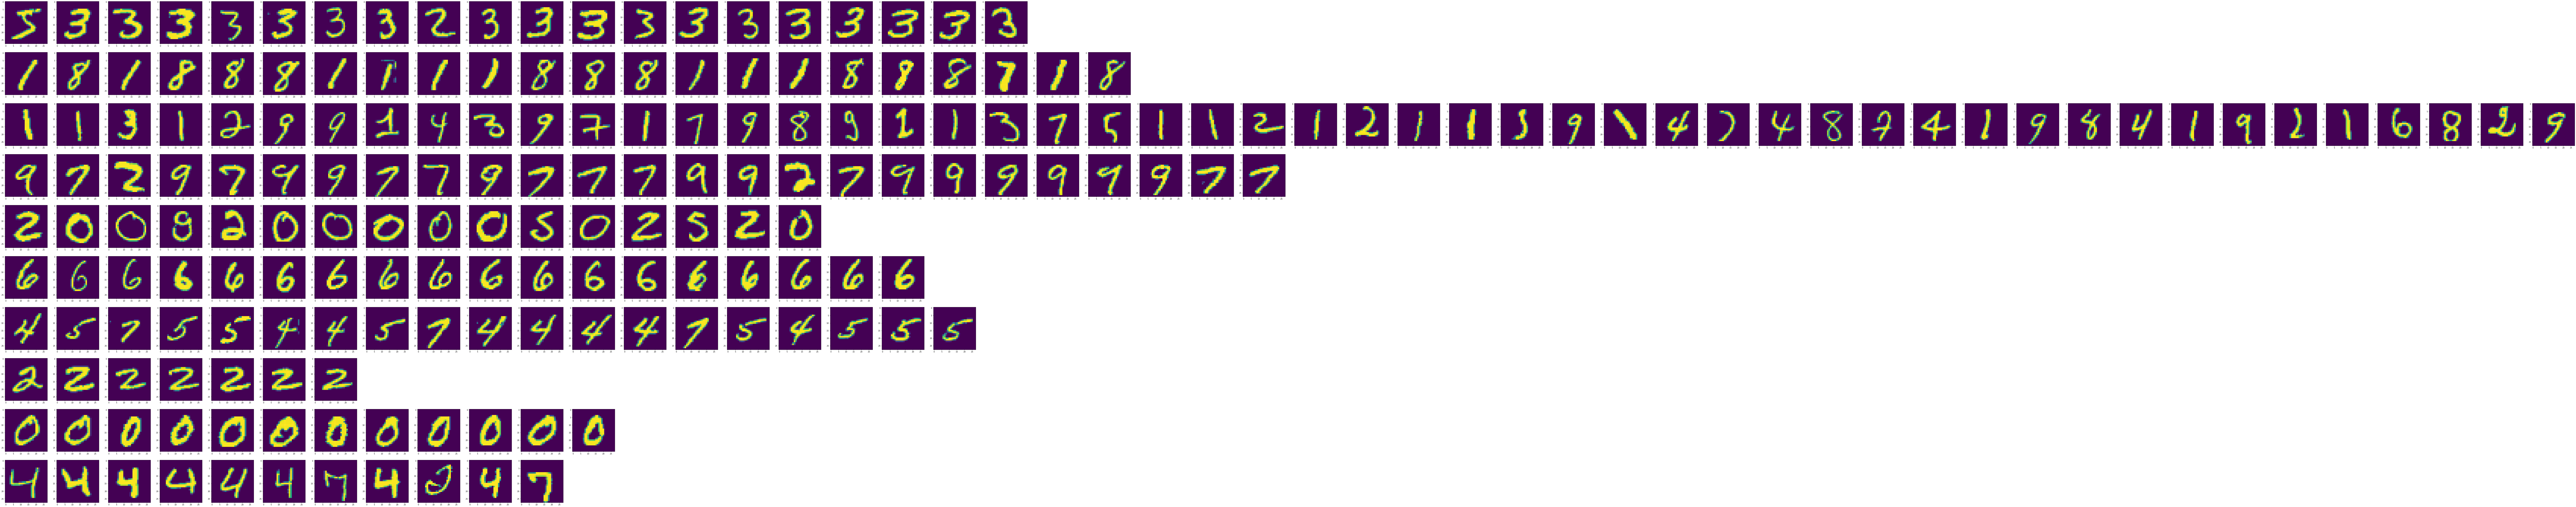

In [ ]:
index = 0
plt.figure(figsize = (250, 50))
for i in range(10):
  for j in range(200):
    if ward.labels_[j] == i:
      plt.subplot(10, 50, index + 1)
      index = index + 1
      plt.imshow(data[j])
  if index % 50 != 0:
    index = index + 50 - (index % 50)

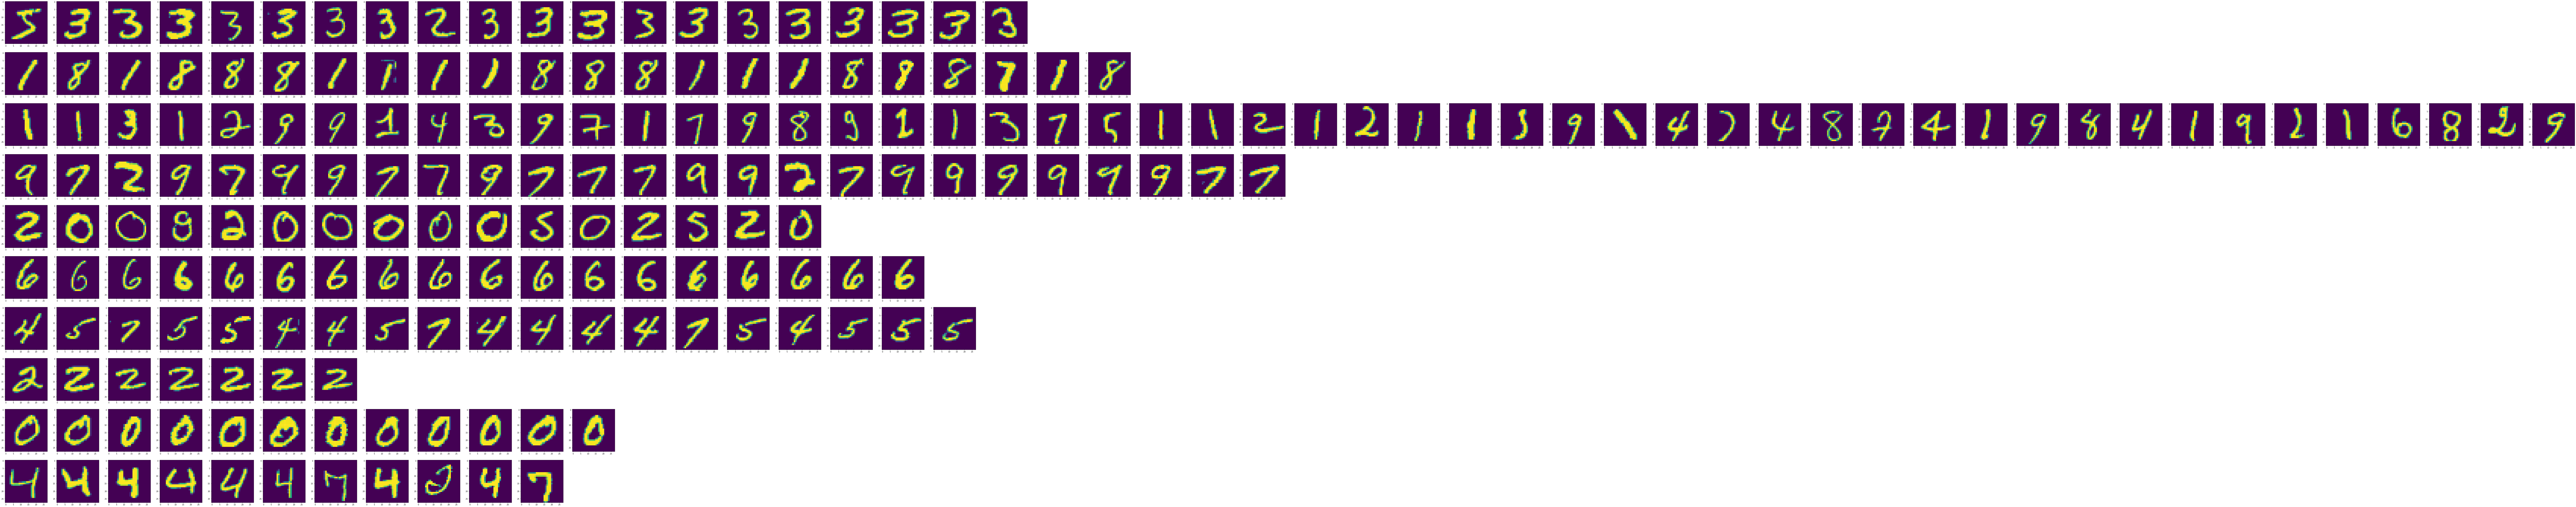

In [ ]:
index = 0
plt.figure(figsize = (250, 50))
for i in range(10):
  for j in range(200):
    if brc.labels_[j] == i:
      plt.subplot(10, 50, index + 1)
      index = index + 1
      plt.imshow(data[j])
  if index % 50 != 0:
    index = index + 50 - (index % 50)

In [ ]:
import numpy as np
P = np.array([[0.15, 0.85],[0.91, 0.09]])
eigenval, eigenvec = np.linalg.eig(P)
eigenvec

array([[ 0.70710678, -0.68260433],
       [ 0.70710678,  0.73078816]])